In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,71983,None,None,86085.715275
2020-06-13,71984,None,None,79940.811469
2020-06-14,71985,None,None,74244.112992
2020-06-15,71986,None,None,68878.187593
2020-06-16,71987,None,None,64137.552455
...,...,...,...,...
2021-06-21,72357,None,None,228628.672904
2021-06-22,72358,None,None,236472.024011
2021-06-23,72359,None,None,244559.209575


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-06-25_2021-06-25-19-27.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-06-24_2021-06-24-19-27.pickle


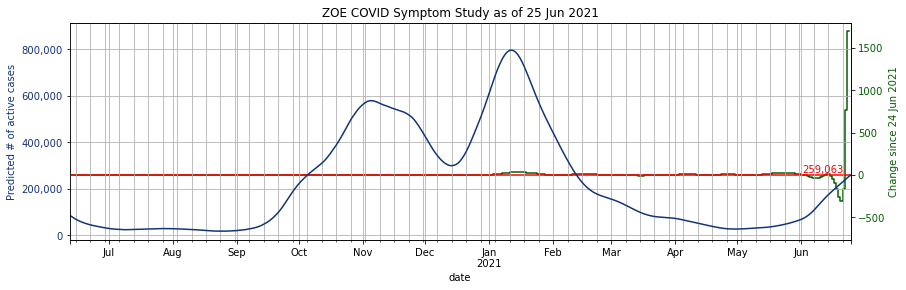

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

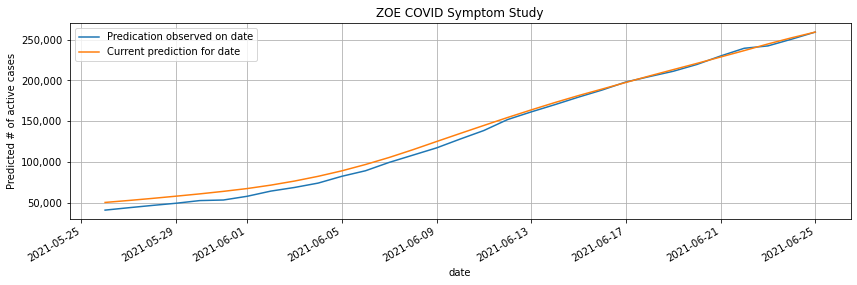

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-06-25_2021-06-25-19-28.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
390,Dundee City,S12000042,3.684971
313,Aberdeen City,S12000033,3.050935
276,Liverpool,E08000012,2.082341
164,Chorley,E07000118,1.742611
235,Manchester,E08000003,1.663002
306,Midlothian,S12000019,1.549046
297,Falkirk,S12000014,1.314365
266,Bolton,E08000001,1.268059
270,Salford,E08000006,1.237740
287,Birmingham,E08000025,1.227683
